In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [17]:
batteries = pd.read_csv("lithium-ion batteries.csv")
batteries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Materials Id           339 non-null    object 
 1   Formula                339 non-null    object 
 2   Spacegroup             339 non-null    object 
 3   Formation Energy (eV)  339 non-null    float64
 4   E Above Hull (eV)      339 non-null    float64
 5   Band Gap (eV)          339 non-null    float64
 6   Nsites                 339 non-null    int64  
 7   Density (gm/cc)        339 non-null    float64
 8   Volume                 339 non-null    float64
 9   Has Bandstructure      339 non-null    bool   
 10  Crystal System         339 non-null    object 
dtypes: bool(1), float64(5), int64(1), object(4)
memory usage: 26.9+ KB


### Features
- Materials Id: The unique ID of the material as stated on materialsproject.org
- Formula: Chemical formula of the material
- Spacegroup: ?
- Formation Energy (eV): ?
- E Above Hull (eV): Energy if decomposition of material into most stable ones
- Band Gap (eV): 
- Nsites: Number of atoms in the unit cell of the crystal
- Density (gm/cc)': The density of bulk crystalline materials
- Volume: The unit cell volume of the material
- Has Bandstructure: Boolean variable for bandstructure
### Target
- Crystal System: The targe variable

In [20]:
batteries.columns

Index(['Materials Id', 'Formula', 'Spacegroup', 'Formation Energy (eV)',
       'E Above Hull (eV)', 'Band Gap (eV)', 'Nsites', 'Density (gm/cc)',
       'Volume', 'Has Bandstructure', 'Crystal System'],
      dtype='object')

In [18]:
batteries.head(5)

,Materials Id,Formula,Spacegroup,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume,Has Bandstructure,Crystal System
0,mp-849394,Li2MnSiO4,Pc,-2.699,0.006,3.462,16,2.993,178.513,True,monoclinic
1,mp-783909,Li2MnSiO4,P21/c,-2.696,0.008,2.879,32,2.926,365.272,True,monoclinic
2,mp-761311,Li4MnSi2O7,Cc,-2.775,0.012,3.653,28,2.761,301.775,True,monoclinic
3,mp-761598,Li4Mn2Si3O10,C2/c,-2.783,0.013,3.015,38,2.908,436.183,True,monoclinic
4,mp-767709,Li2Mn3Si3O10,C2/c,-2.747,0.016,2.578,36,3.334,421.286,True,monoclinic


In [23]:
# Column names are uncomfortable, so i decided to rename them
mapper = {'Materials Id': 'mat_id',
'Formula': 'formula',
'Spacegroup': 'spacegroup',
'Formation Energy (eV)': 'form_e',
'E Above Hull (eV)': 'above_hull_e',
'Band Gap (eV)': 'band_gap_e',
'Nsites': 'n_sites',
'Density (gm/cc)': 'density',
'Volume': 'volume',
'Has Bandstructure': 'has_bandstr',
'Crystal System': 'crystal_system'}
df = batteries.rename(columns=mapper)
df.head(5)

,mat_id,formula,spacegroup,form_e,above_hull_e,band_gap_e,n_sites,density,volume,has_bandstr,crystal_system
0,mp-849394,Li2MnSiO4,Pc,-2.699,0.006,3.462,16,2.993,178.513,True,monoclinic
1,mp-783909,Li2MnSiO4,P21/c,-2.696,0.008,2.879,32,2.926,365.272,True,monoclinic
2,mp-761311,Li4MnSi2O7,Cc,-2.775,0.012,3.653,28,2.761,301.775,True,monoclinic
3,mp-761598,Li4Mn2Si3O10,C2/c,-2.783,0.013,3.015,38,2.908,436.183,True,monoclinic
4,mp-767709,Li2Mn3Si3O10,C2/c,-2.747,0.016,2.578,36,3.334,421.286,True,monoclinic


Let's start by visualizing the data with a few distribution plots.

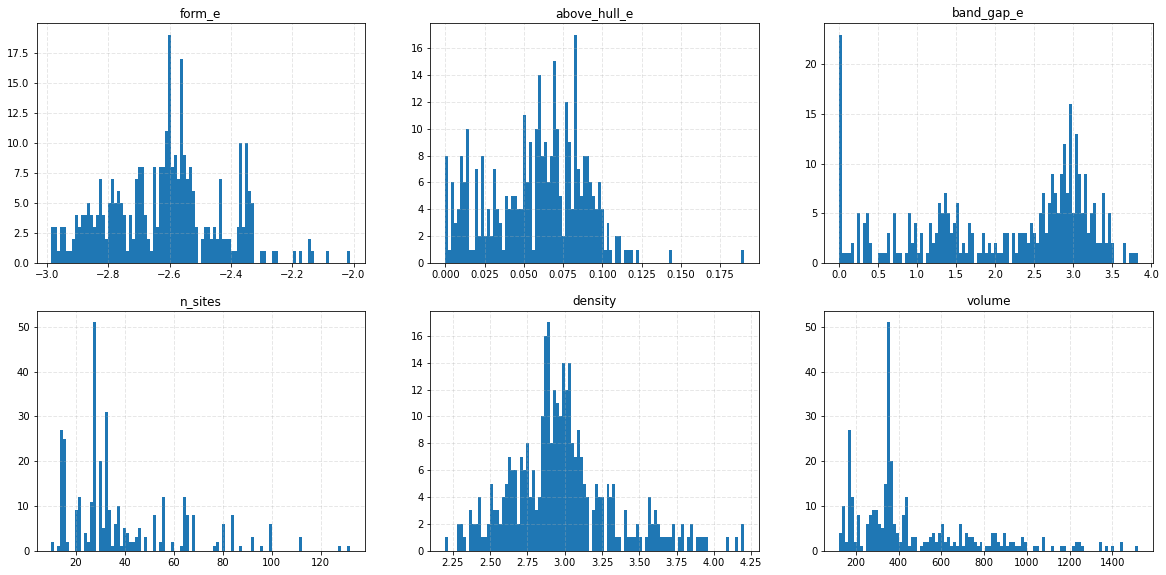

In [46]:
numerical = ['form_e', 'above_hull_e', 'band_gap_e', 'n_sites', 'density', 'volume']
fig = plt.figure(figsize=(20,15))
for i, ft in enumerate(numerical):
    ax = fig.add_subplot(3,3,i+1)
    ax.hist(df[ft], bins=100)
    ax.set_title(numerical[i])
    plt.grid(visible=True, linestyle='--', linewidth=1, alpha=0.3)
plt.show()